In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
in_state = pd.read_csv("C:\\Users\\RAJATH H S\\Downloads\\EV Stats-1.csv")
in_state.drop("Sl. No", axis=1, inplace=True)
in_state.drop("Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules",axis=1,inplace=True)
in_state.drop("Two Wheelers (Category L2 (CMVR))",axis=1,inplace=True)
in_state.drop("Two Wheelers (Max power not exceeding 250 Watts)",axis=1,inplace=True)
in_state.drop("Three Wheelers (Category L5 slow speed as per CMVR)",axis=1,inplace=True)
in_state.drop("Three Wheelers (Category L5 as per CMVR)",axis=1,inplace=True)
in_state.drop("Passenger Cars (Category M1 as per CMVR)",axis=1,inplace=True)
in_state.drop("Buses",axis=1,inplace=True)
in_state=in_state.sort_values("Total in state",ascending=False)
print(in_state)

                                                State  Total in state
14                                        Maharashtra         34013.0
6                                             Gujarat         31267.0
24                                      Uttar Pradesh         26209.0
7                                             Haryana         23589.0
4                                               Delhi         19381.0
21                                         Tamil Nadu         16746.0
20                                          Rajasthan         15763.0
26                                        West Bengal         14140.0
11                                          Karnataka         13386.0
12                                             Kerala         11202.0
0                                      Andhra Pradesh          9492.0
22                                          Telangana          9034.0
19                                             Punjab          6538.0
13                  

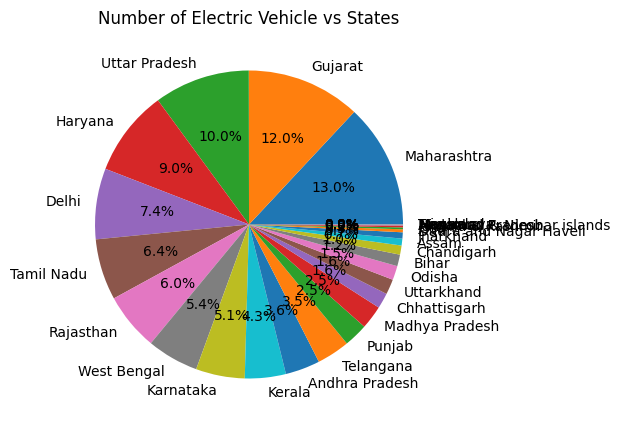

In [38]:
top5 = in_state[:30]
plt.figure(figsize=(5,5))
plt.title("Number of Electric Vehicle vs States")
plt.pie(top5["Total in state"], labels=top5["State"], autopct='%1.1f%%')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

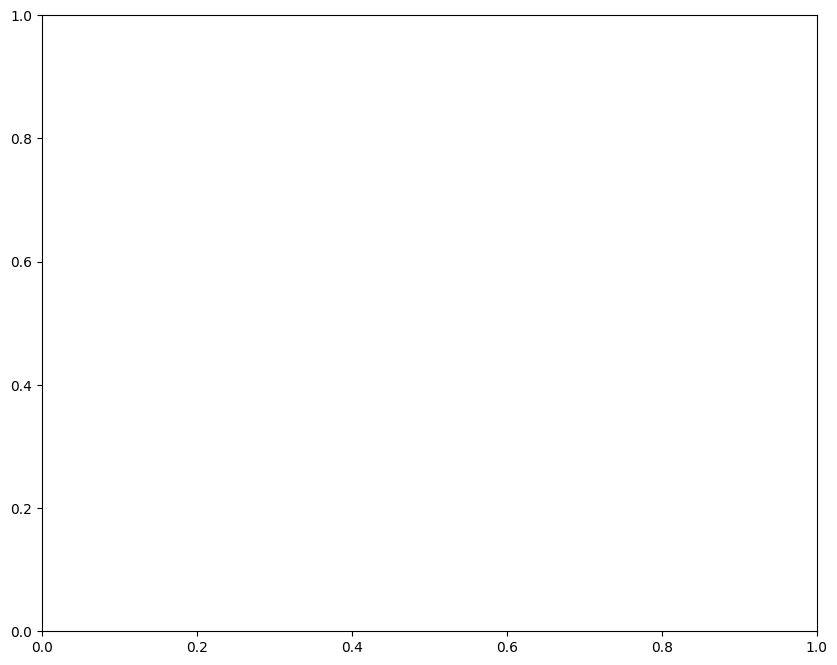

In [42]:

plt.figure(figsize=(10,8))
plt.barh(in_state["Total in state"], in_state["State"])
plt.title("Number of Electric Vehicles vs States", fontsize=18)
plt.xlabel("Number of Electric Vehicle", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [44]:
charge_points_in_state = pd.read_csv("C:\\Users\RAJATH H S\\Downloads\\EV Charge Points.csv")
charge_points_in_state.drop([len(charge_points_in_state)-1], axis=0, inplace=True)
charge_points_in_state = charge_points_in_state.sort_values(["Number of Electric Vehicle Charging Sanctioned"], ascending=False)
charge_points_in_state.head()

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207


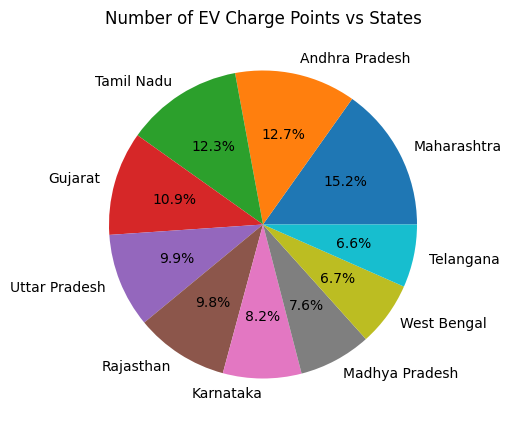

In [45]:
top10 = charge_points_in_state[:10]
plt.figure(figsize=(5,5))
plt.title("Number of EV Charge Points vs States")
plt.pie(top10["Number of Electric Vehicle Charging Sanctioned"], labels=top10["State/UT-wise"], autopct='%1.1f%%')
plt.show()

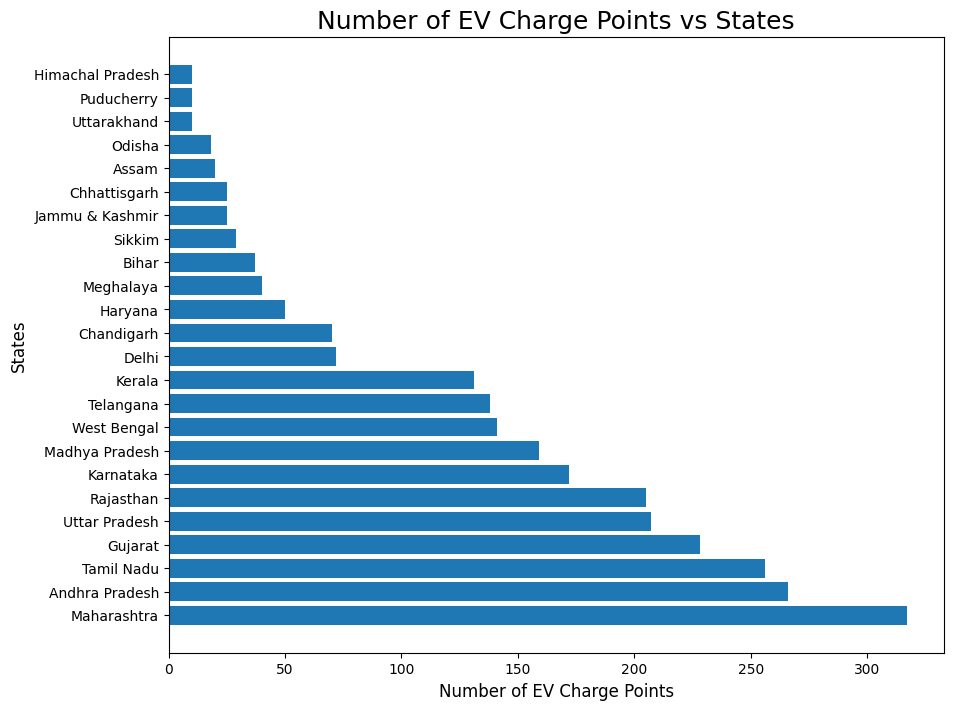

In [47]:
plt.figure(figsize=(10,8))
plt.barh(charge_points_in_state["State/UT-wise"], charge_points_in_state["Number of Electric Vehicle Charging Sanctioned"])
plt.title("Number of EV Charge Points vs States", fontsize=18)
plt.xlabel("Number of EV Charge Points", fontsize=12)
plt.ylabel("States", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [49]:
car_details = pd.read_csv("C:\\Users\\RAJATH H S\\Downloads\\EV_Car_Modified.csv")
car_details.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,4400000
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,2400000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,4515200
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,5443200
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,2639760


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


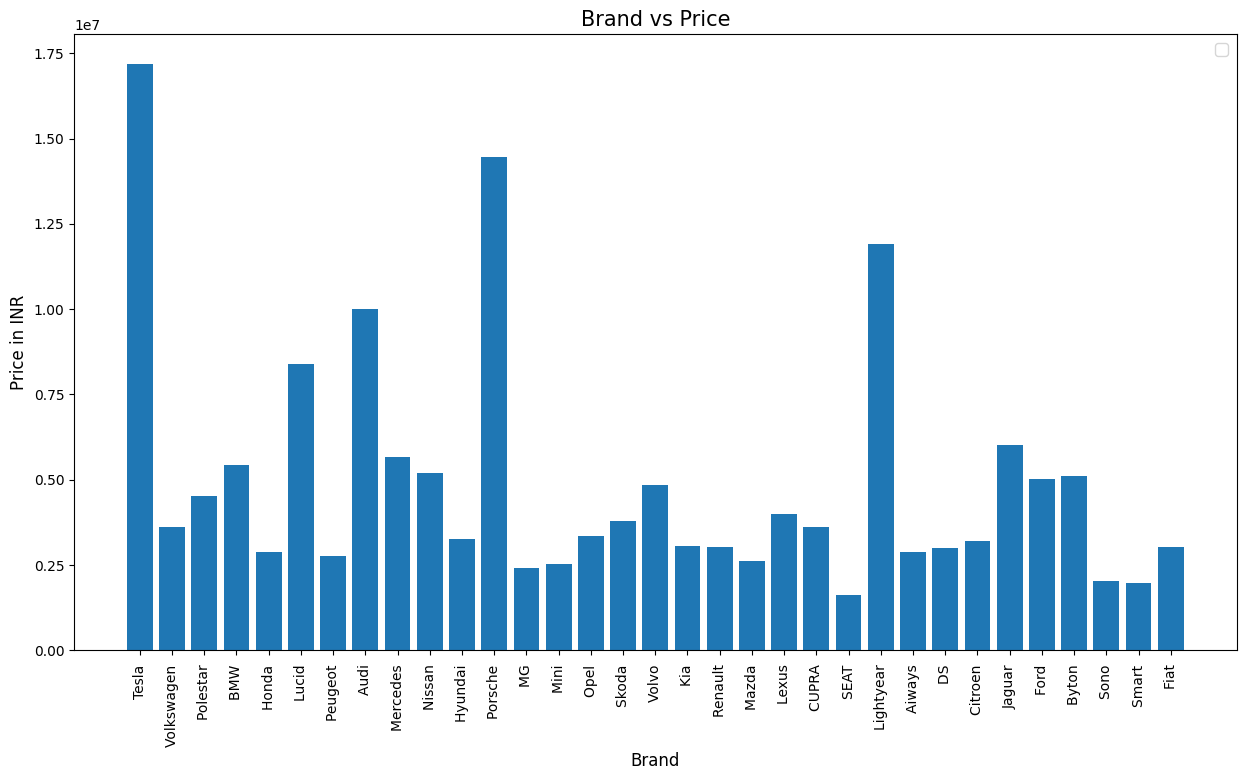

In [56]:
plt.figure(figsize=(15,8))
plt.bar(car_details.Brand, car_details.Price)
plt.xticks(rotation=90)
plt.title("Brand vs Price", fontsize=15)
plt.ylabel("Price in INR", fontsize=12)
plt.xlabel("Brand", fontsize=12)
plt.legend(fontsize=12)
plt.show()

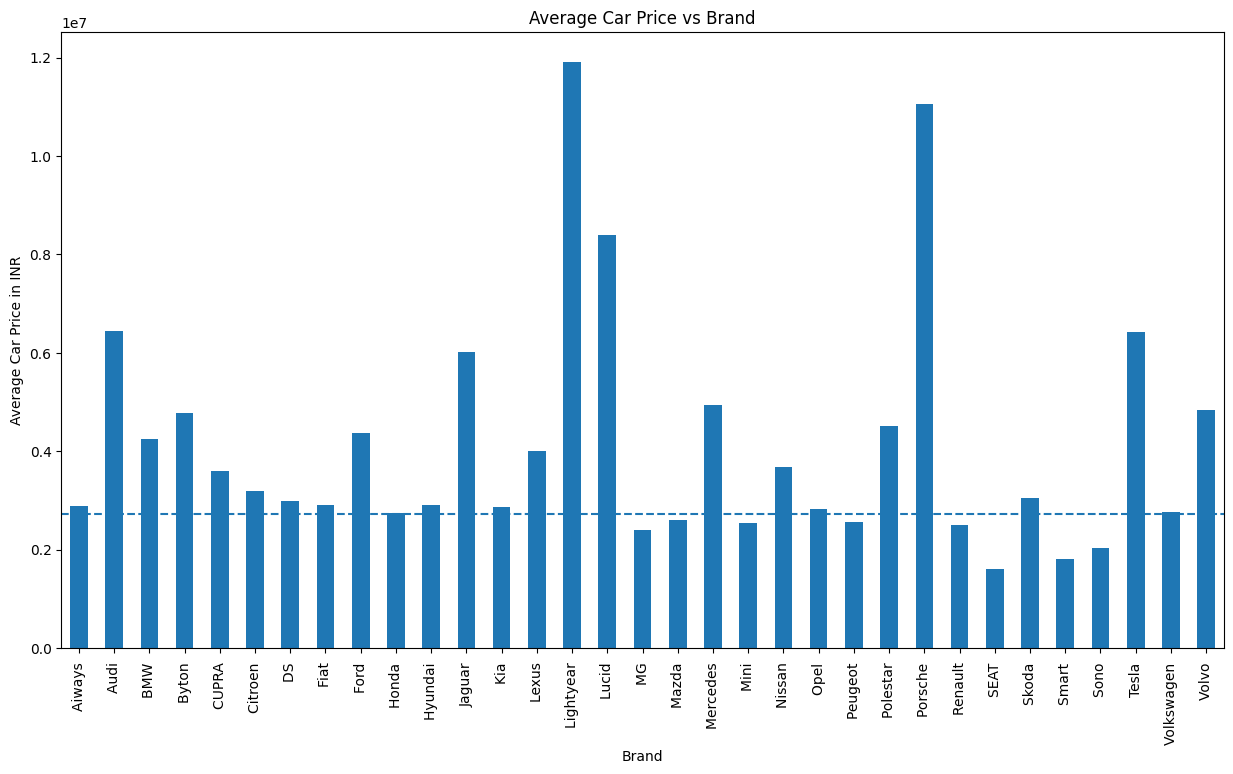

In [58]:
%matplotlib inline
y = car_details.groupby(["Brand"])["Price"].mean()
y.plot(kind="bar", figsize=(15,8))
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Average Car Price in INR")
plt.title("Average Car Price vs Brand")
plt.axhline(car_details.Price.std(), linestyle="--")
plt.show()

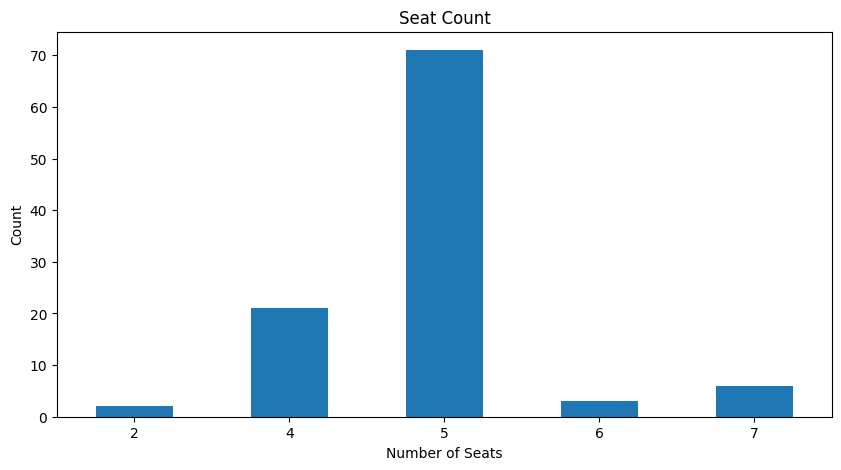

In [59]:
y = car_details.Seats.value_counts().sort_index(ascending=True)
y.plot(kind="bar", figsize=(10,5))
plt.xticks(rotation=0)
plt.xlabel("Number of Seats")
plt.ylabel("Count")
plt.title("Seat Count")
plt.show()

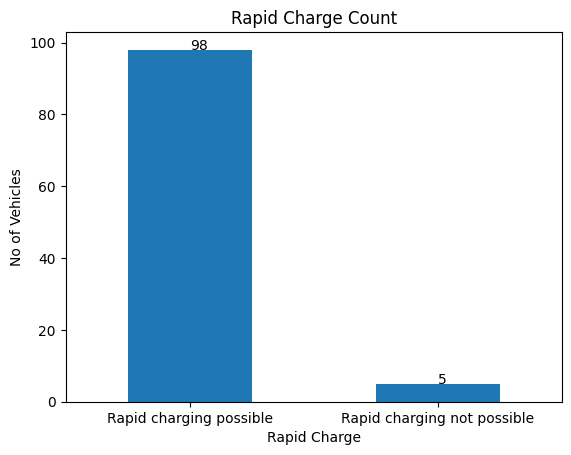

In [62]:
y = car_details.RapidCharge.value_counts()
car_details.RapidCharge.value_counts().plot(kind="bar")
plt.xticks(rotation=0)
for i in range(len(y)):
    plt.text(i,y[i],y[i])
plt.xlabel("Rapid Charge")
plt.ylabel("No of Vehicles")
plt.title("Rapid Charge Count")
plt.show()
     